<a href="https://colab.research.google.com/github/Asmoday-McK/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Kenneth_Barrett_DS_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 5.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# First, I am going to import pandas.

import pandas as pd

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')

df.head()

# There is, in fact, the correct number of observations

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [0]:
# Now, let's check that there are no missing values.

df.isna().sum()

# Let's double check it, shall we?

df.sample(100) # Ran this a couple of times, looks like we're good!

In [0]:
# Now, let's add names to these columns.

column_names = ['Age', 'Operation_Year', 'Positive_Nodes', 'Survived']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names = column_names)

df.head()

# Cool! It worked!

,Age,Operation_Year,Positive_Nodes,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# Next, we're going to change the 'Survived' column into binary values 0 and 1.

df['Survived'] = df['Survived'].replace(1, 0) # If died within 5 years, value is 0.

df['Survived'] = df['Survived'].replace(2, 1) # If lived 5 years or more, value is 1.

# Let's double check that it worked...

df['Survived'].sample(100)

# Success!

33     0
158    1
21     0
181    1
214    0
171    0
298    0
66     0
140    0
259    1
180    1
281    1
85     0
288    0
280    0
279    0
28     0
241    0
165    0
101    0
155    0
215    1
277    0
195    0
3      0
240    1
282    0
55     0
185    0
70     0
      ..
236    0
57     0
179    0
232    0
5      0
174    0
184    0
173    0
305    1
117    0
141    0
19     0
121    0
219    0
92     1
83     0
125    1
252    0
11     0
97     1
132    0
144    1
301    0
207    0
43     1
133    0
16     0
239    1
206    0
123    0
Name: Survived, Length: 100, dtype: int64

In [0]:
df['Survived'] = df['Survived'].replace(2, 1) # If lived 5 years or more, value is 1.


df['Survived'].sample(100)

189    0
208    0
29     0
13     0
16     0
267    0
85     0
125    1
127    0
42     0
184    0
193    0
132    0
242    0
299    1
224    1
151    0
225    0
292    0
209    0
118    0
129    0
18     0
298    0
83     0
66     0
277    0
81     1
160    1
185    0
      ..
257    0
61     0
71     0
82     1
240    1
51     0
33     0
133    0
178    0
26     0
169    1
303    0
227    0
116    0
241    0
120    0
52     0
17     0
281    1
233    0
173    0
4      0
139    0
166    0
3      0
76     0
39     0
280    0
271    0
287    0
Name: Survived, Length: 100, dtype: int64

In [0]:
# Last part of part 1...

df.head(5)

,Age,Operation_Year,Positive_Nodes,Survived
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# First I'm going to make a bin for age.

bin1 = pd.cut(df['Age'], 10)

# Now, I'm going to make a crosstab between age and survival rate.

pd.crosstab(bin1, df['Survived']) # So, the 0 column in this crosstab is number of people who didn't survive 5+ years, 1 column is those who did.

Survived,0,1
Age,,
"(29.947, 35.3]",14,2
"(35.3, 40.6]",25,2
"(40.6, 45.9]",31,15
"(45.9, 51.2]",37,16
"(51.2, 56.5]",37,18
"(56.5, 61.8]",32,9
"(61.8, 67.1]",29,12
"(67.1, 72.4]",14,4
"(72.4, 77.7]",6,1


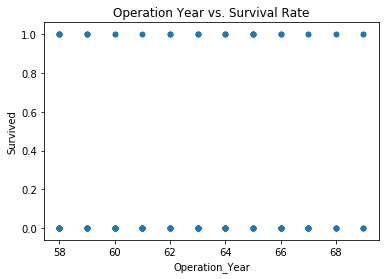

In [0]:
df.plot(kind = 'scatter', x = 'Operation_Year', y = 'Survived', title = 'Operation Year vs. Survival Rate'); # This tells me there is no correlation between survival rates and the year the operation took place.

In [0]:
# Now, I'm going to make a bin for Positive_Nodes

bin2 = pd.cut(df['Positive_Nodes'], 10)

# And compare to age?

pd.crosstab(bin1, df['Age']).sample(10)

# Does not look like there is correlation between the number of positive nodes and age.

Age,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,83
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


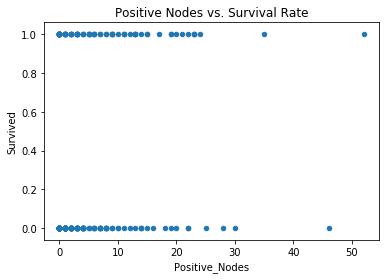

In [0]:
df.plot(kind = 'scatter', x = 'Positive_Nodes', y = 'Survived', title = 'Positive Nodes vs. Survival Rate'); # This tells me that the more positive nodes, the less chance of survival, with ~23 or more nodes having next to 0 survival rate.

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
# I'm going to do this using the query function.

df_did = df.query('Survived == 1') # This is the dataframe for those who survived
df_didnot = df.query('Survived == 0') # This is the dataframe for those who did not survive

,Age,Operation_Year,Positive_Nodes,Survived
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0
5,33,58,10,0
6,33,60,0,0
9,34,58,30,0
10,34,60,1,0
11,34,61,10,0


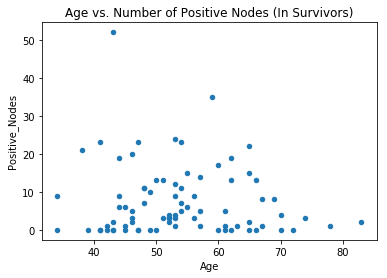

In [0]:
# Now let's make these graphs!

df_did.plot(kind = 'scatter', x = 'Age', y = 'Positive_Nodes', title = 'Age vs. Number of Positive Nodes (In Survivors)');

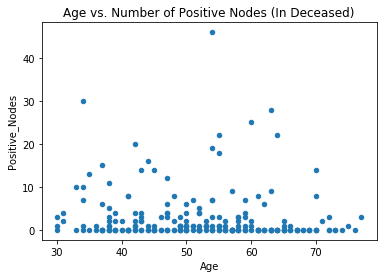

In [0]:
df_didnot.plot(kind = 'scatter', x = 'Age', y = 'Positive_Nodes', title = 'Age vs. Number of Positive Nodes (In Deceased)');

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



1.  It appears that chances of survival have a positive relationship with age. From the scatterplot shown below, I can infer that the older you are, the better chance at survival. I say this because up until about age 40, very few patients survives, and it increases from there, then drops back off around age 60. Kind of a tricky one.

2.   One feature that appears to have a negative relationship with survival is the number of positive nodes. From the data I can infer that the fewer number of positive nodes, the better chance of the patient's survival.


3.   In the second scatterplot below, you will see that around age 40, the number of positive nodes increases. I suspect that this relation is due to the possibility of detection rates in lower amounts of positive nodes.

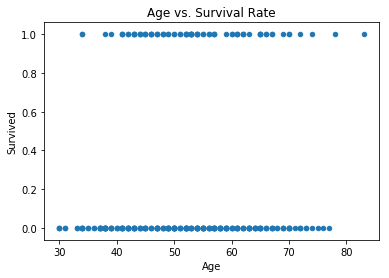

In [0]:
df.plot(kind = 'scatter', x = 'Age', y = 'Survived', title = 'Age vs. Survival Rate');

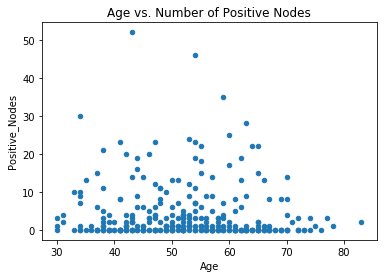

In [0]:
df.plot(kind = 'scatter', x = 'Age', y = 'Positive_Nodes', title = 'Age vs. Number of Positive Nodes');